In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, precision_recall_curve

import warnings

warnings.filterwarnings('ignore')

In [2]:
titanic = pd.read_csv("titanictrain.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic.Sex=titanic.Sex.replace({"male":1, "female":2})

In [5]:
titanic=titanic.drop("PassengerId", axis=1)
titanic=titanic.drop("Ticket", axis=1)
titanic=titanic.drop("Name", axis=1)
titanic=titanic.drop("Cabin", axis=1)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic=titanic.dropna(subset=['Embarked'])

In [6]:
titanic.Embarked=titanic.Embarked.replace({'C':1, 'S':2, 'Q':3})

In [7]:
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,2,38.0,1,0,71.2833,1
2,1,3,2,26.0,0,0,7.9250,2
3,1,1,2,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
X=titanic.iloc[:,2:]
y=titanic["Survived"]

In [9]:
X_eğitim, X_test, y_eğitim, y_test = train_test_split(X, y, test_size=0.20, random_state=276)

In [10]:
model_1=titanic[["Pclass", "Sex", "Age"]]

X_eğitim, X_test, y_eğitim, y_test = train_test_split(model_1, y, test_size=0.20, random_state=276)

loj_1vsR=LogisticRegression()
loj_1vsR.fit(X_eğitim, y_eğitim)

loj_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
loj_mnm.fit(X_eğitim, y_eğitim)


egt_dogruluk_1vsR = loj_1vsR.score(X_eğitim, y_eğitim)
test_dogruluk_1vsR = loj_1vsR.score(X_test, y_test)

egt_dogruluk_mnm = loj_mnm.score(X_eğitim, y_eğitim)
test_dogruluk_mnm = loj_mnm.score(X_test, y_test)

print('One-vs-rest', '-'*20,
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_1vsR), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_1vsR), sep='\n')

print('\n\nMultinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egt_dogruluk_mnm), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk_mnm), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.80
Modelin test verisindeki doğruluğu   : 0.78


In [11]:
tahmin_eğitim = loj_1vsR.predict(X_eğitim)
tahmin_test = loj_1vsR.predict(X_test)

hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [12]:
tahmin_test_ihtimal = loj_1vsR.predict_proba(X_test)

In [13]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("\nHata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

print("\nAccuracy değeri  : ",  accuracy_score(y_test, tahmin_test))
print("\nHata değeri      : ",  1- accuracy_score(y_test, tahmin_test))
print("\nPrecision değeri : ",  precision_score(y_test, tahmin_test))
print("\nRecall değeri    : ",  recall_score(y_test, tahmin_test))
print("\nF1 değeri        : ",  f1_score(y_test, tahmin_test))
print("\nLogartimik Kayıp : " , log_loss(y_test, tahmin_test_ihtimal))

Hata Matrisi (Eğitim verileri)
------------------------------
[[381  62]
 [ 77 191]]

Hata Matrisi (Test verileri)
------------------------------
[[90 16]
 [24 48]]

Accuracy değeri  :  0.7752808988764045

Hata değeri      :  0.2247191011235955

Precision değeri :  0.75

Recall değeri    :  0.6666666666666666

F1 değeri        :  0.7058823529411765

Logartimik Kayıp :  0.50378258179453


In [14]:
C_değerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri: 
    # Apply logistic regression model to training data
    lr = LogisticRegression(C = c)
    lr.fit(X_eğitim,y_eğitim)

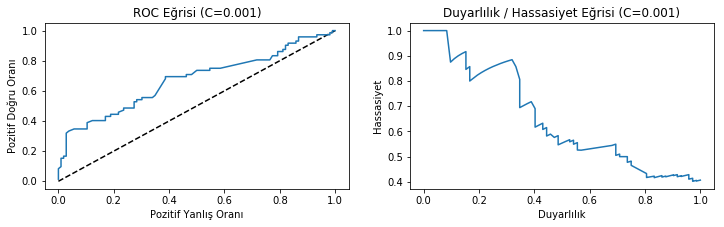

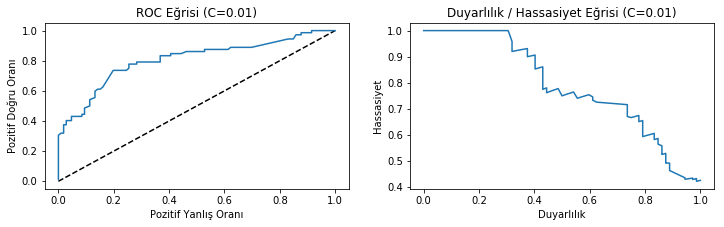

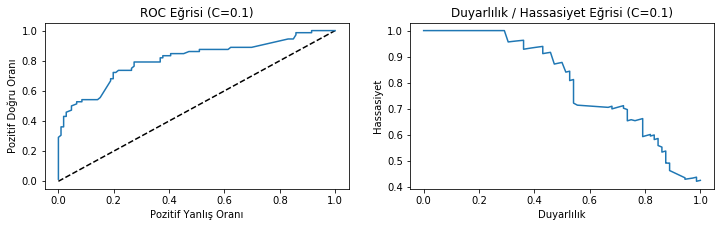

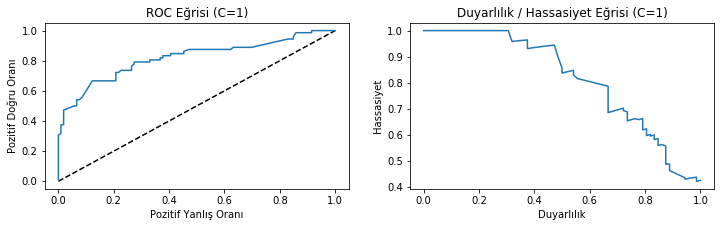

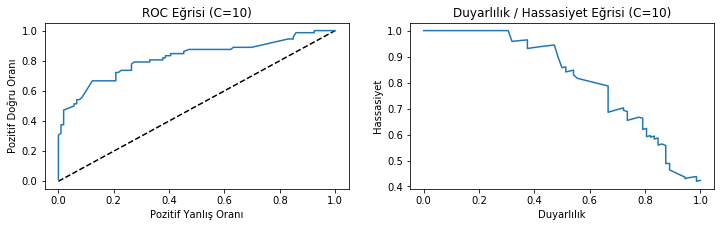

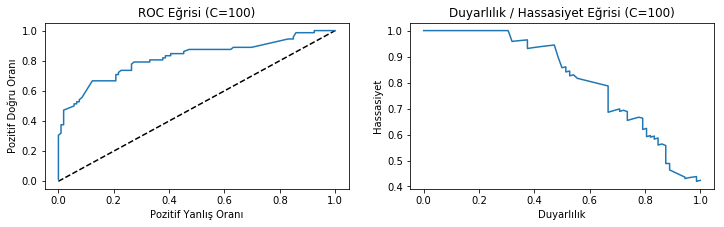

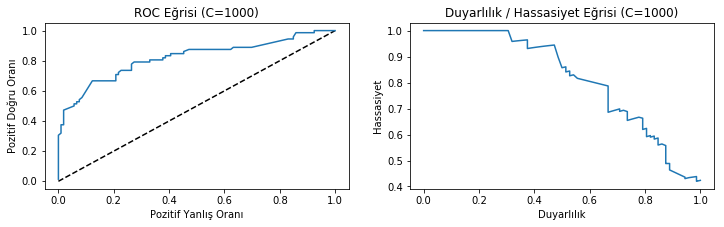

In [15]:
C_degerleri = [0.001,0.01,0.1,1,10,100, 1000]
sira=1

for c in C_degerleri:
    loj_1vsR = LogisticRegression(C = c)
    loj_1vsR.fit(X_eğitim,y_eğitim)
    
    tahmin_test_ihtimal = loj_1vsR.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)
    hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

    plt.figure(figsize=(12,25))
    plt.subplot(len(C_degerleri),2,sira)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('Pozitif Yanlış Oranı')
    plt.ylabel('Pozitif Doğru Oranı')
    plt.title('ROC Eğrisi (C={})'.format(c))

    plt.subplot(len(C_degerleri),2,sira+1)
    plt.plot(duyarlılık, hassasiyet)
    plt.xlabel('Duyarlılık')
    plt.ylabel('Hassasiyet')
    plt.title('Duyarlılık / Hassasiyet Eğrisi (C={})'.format(c))
    
    sira+=2

plt.show()